# 3.1. Weighted Least Squares and Robust Fitting

One can show that this solution has a high breakdown point, but still simple inferential
results (see 3.1.o). This approach is implemented in R

In [1]:
library(datasets)
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [3]:
D = mtcars
D$x1 = D$disp
D$x2 = D$wt
D$y = D$mpg

library(robustbase)
D.rlm <- lmrob(y ~ x1 + x2, data=D)
summary(D.rlm)


Call:
lmrob(formula = y ~ x1 + x2, data = D)
 \--> method = "MM"
Residuals:
    Min      1Q  Median      3Q     Max 
-2.8060 -1.9312 -0.3299  1.9172  7.1136 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.01325    3.86850   8.792 1.12e-09 ***
x1          -0.01588    0.00914  -1.737    0.093 .  
x2          -3.32315    1.37357  -2.419    0.022 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Robust residual standard error: 2.178 
Multiple R-squared:  0.7773,	Adjusted R-squared:  0.7619 
Convergence in 19 IRWLS iterations

Robustness weights: 
 one weight is ~= 1. The remaining 31 ones are summarized as
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2640  0.8657  0.9166  0.8622  0.9588  0.9984 
Algorithmic parameters: 
       tuning.chi                bb        tuning.psi        refine.tol 
        1.548e+00         5.000e-01         4.685e+00         1.000e-07 
          rel.tol         scale.tol         solve.tol       ep

recomputing robust Mahalanobis distances

saving the robust distances 'MD' as part of 'D.rlm'



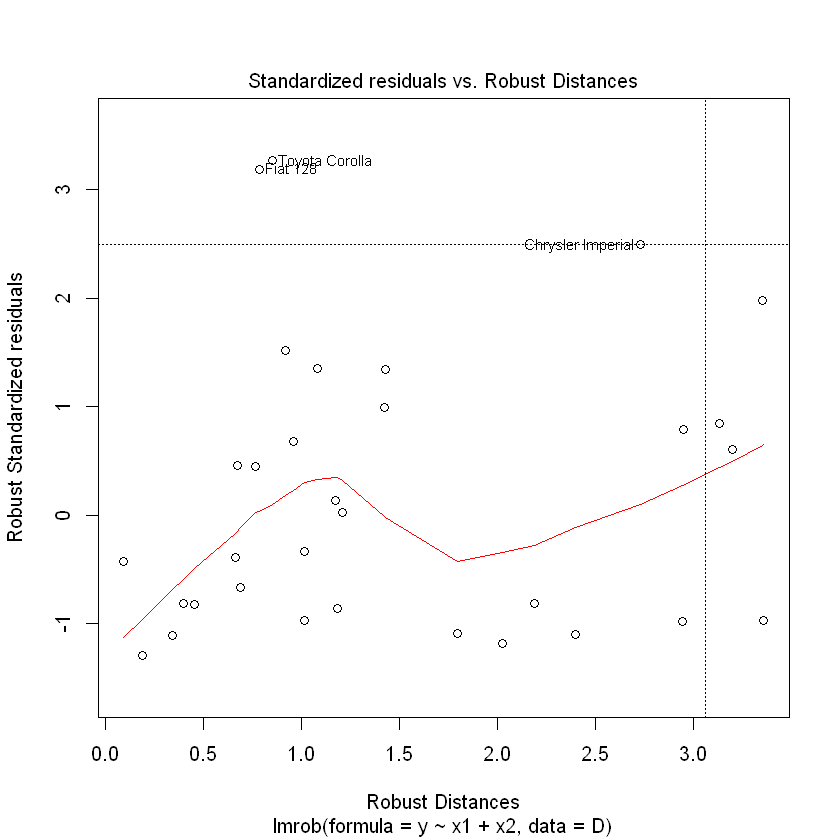

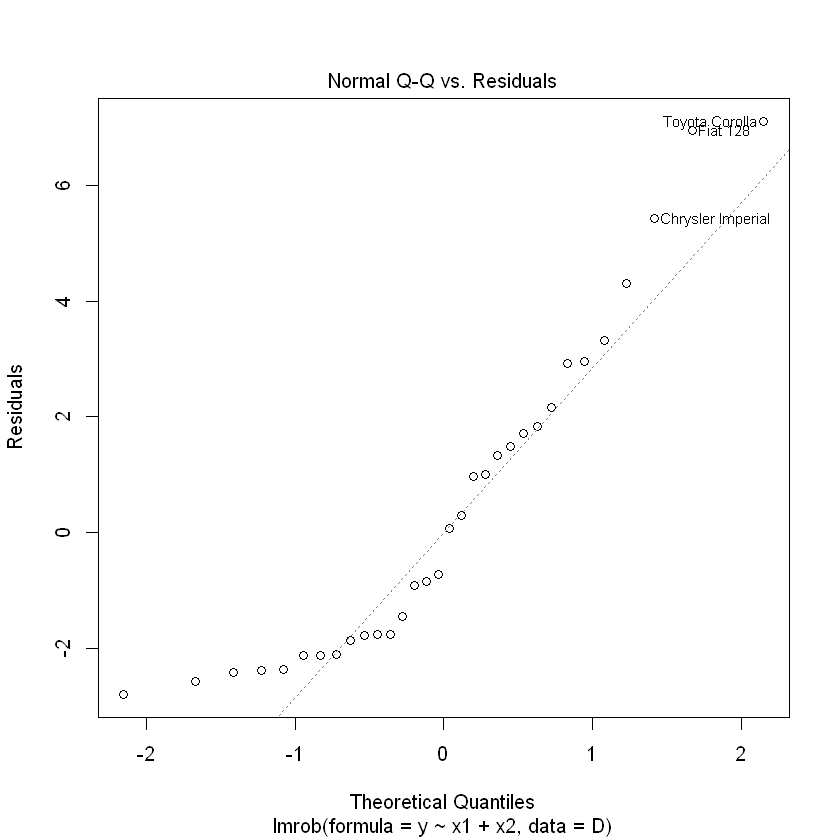

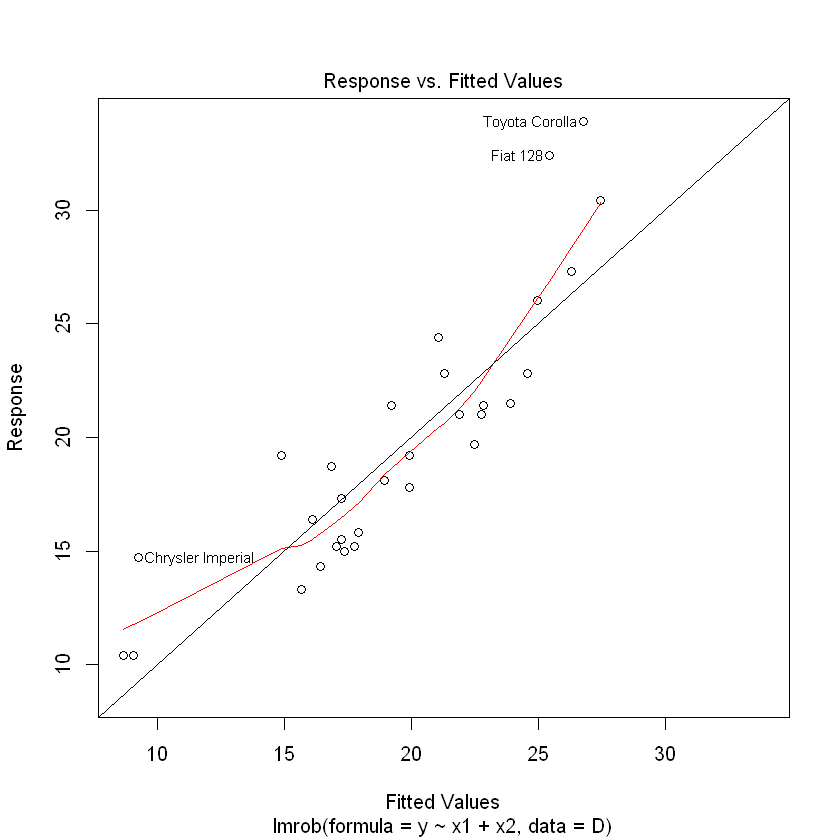

In [4]:
plot(D.rlm) # residual plots

# 3.3. Fitting Smooth Functions and Additive Models

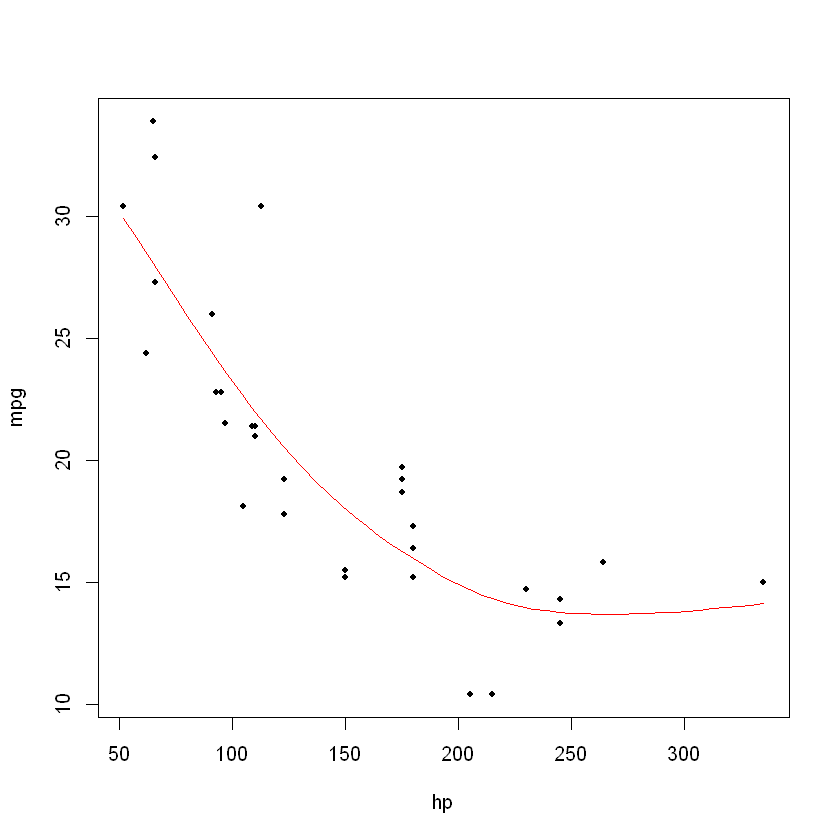

In [7]:
library(mgcv)
mtcars1 = mtcars
myfit <- gam(mpg ~ s(hp), data=mtcars1)
h.x <- seq(min(mtcars1$hp), max(mtcars1$hp), length=51)
h.p <- predict(myfit, newdata=data.frame(hp=h.x))
plot(mpg ~ hp, data=mtcars1, pch=20)
lines(h.x, h.p, col="red")